# fifa analysis: replacements
---

# summary
* My goal is to suggest replacements for bad players on a given team.
* I search for replacements based on skill (normalized for age), wage, and position.


# context
This is an exercise i've created to practice analytics. I am using a dataset from kaggle.com that represents individual fifa players. My goal is to provide insights for a team manager from the data. I assume that the team manager wants to optimize for the most skilled team that brings the most money.
   
#### data
* Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
* Player performance attributes (Overall, Potential, Aggression, Agility etc.)
* Player preferred position and ratings at all positions.

---


---
# minimal recruiting filter
### problem
The client wants to replace his worst player with a new player of equal skill, who would be willing to work for a lower salary.

### hypothesis
Replacement players can be found by filtering on value,overall,and wage. These are all numerical fields that only need minimal conversions.

### assumptions
* replacement players can be from any team.
* replacements must have at least equal overall,value to the player being replaced.
* the only skill column to be compared is "Overall". 
* replacements must currently earn no more than half of the replaced player's salary.
* I only need to produce between 5 and 10 replacements.

### procedure
* import necessary libraries and data
* pick 1 team to consult for: Real Madrid CF
* pick the worst player and find all other players that are as good as him,have as good value as him, and are cheaper

---

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
players = pd.read_csv("CompleteDataset_cleaned.csv",index_col='index')
players.head()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
index,,,,,,,,,,,,,,,,,,,,,
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### picking a team
I've decided to first consult for **Real Madrid**. This is one of the most valuable teams, with one of the biggest budgets and most highly paid players. It should be easy to find players who are just as good but earn significantly less. The solution I come up with should be scalable to all teams eventually.

In [63]:
# find madrid's worst player
madrid = players[players["Club"] == "Real Madrid CF"]
worst_index = madrid["Overall"].argmin()
worst = players.loc[worst_index]

value_replacements = players[
    (players['Overall'] >= worst['Overall']) &
    (players["Value"] >= 20 * worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF")
]

#we have narrowed it down to 7 players
#but maybe I have faulty reasoning:perhaps value is relative to the other players on your team?
#madrid doesn't need more valuable players because it has plenty of those:I will optimize for skill instead 

skill_replacements = players[
    (players['Overall'] >= 1.2 * worst['Overall']) &
    (players["Value"] >= worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF")
]

#it looks like the value_replacements and the skill_replacements are a similar set of people
#let's do a comparison to confirm that
overlap = set(value_replacements.index).intersection(set(skill_replacements.index))

replacements = skill_replacements[skill_replacements.index.isin(overlap)]
replacements
# for now keep the value replacements filter. 
# only remove it once you have understood value better

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
index,,,,,,,,,,,,,,,,,,,,,
252,Taison,29,https://cdn.sofifa.org/48/18/players/188803.png,Brazil,https://cdn.sofifa.org/flags/54.png,82,82,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,21500000.0,...,63.0,55.0,76.0,64.0,81.0,81.0,77.0,82.0,66.0,77.0
253,Marlos,29,https://cdn.sofifa.org/48/18/players/187754.png,Brazil,https://cdn.sofifa.org/flags/54.png,82,82,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,21500000.0,...,64.0,56.0,77.0,65.0,81.0,81.0,76.0,82.0,68.0,76.0
406,Fred,24,https://cdn.sofifa.org/48/18/players/209297.png,Brazil,https://cdn.sofifa.org/flags/54.png,80,85,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,19500000.0,...,76.0,70.0,79.0,76.0,77.0,79.0,72.0,78.0,77.0,72.0
412,T. Stepanenko,27,https://cdn.sofifa.org/48/18/players/206413.png,Ukraine,https://cdn.sofifa.org/flags/49.png,80,81,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,14000000.0,...,76.0,78.0,75.0,79.0,69.0,70.0,68.0,68.0,76.0,68.0
434,Y. Rakitskyi,27,https://cdn.sofifa.org/48/18/players/195861.png,Ukraine,https://cdn.sofifa.org/flags/49.png,80,82,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,14500000.0,...,78.0,79.0,77.0,80.0,71.0,72.0,69.0,70.0,78.0,69.0
559,Bernard,24,https://cdn.sofifa.org/48/18/players/205525.png,Brazil,https://cdn.sofifa.org/flags/54.png,79,84,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,17000000.0,...,59.0,47.0,72.0,57.0,78.0,79.0,73.0,80.0,62.0,73.0
761,K. Fortounis,24,https://cdn.sofifa.org/48/18/players/203980.png,Greece,https://cdn.sofifa.org/flags/22.png,78,82,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,13500000.0,...,56.0,50.0,72.0,58.0,76.0,76.0,73.0,76.0,60.0,73.0


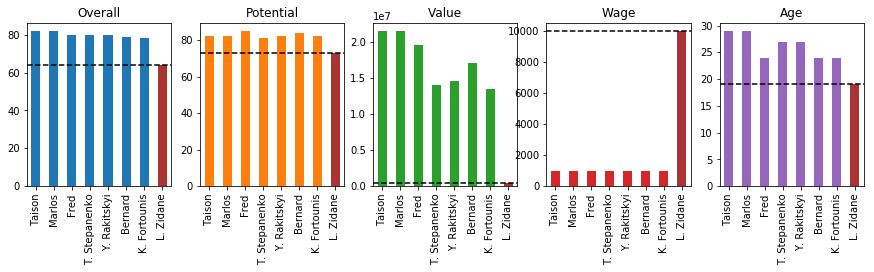

In [64]:
# create visualization to compare differences between replacements and current player

# add the worst player to the comparison
worst = players.loc[worst_index]
comparison = replacements.append(worst)

columns = ['Overall','Potential','Value','Wage','Age','Name']

ax = comparison[columns]\
    .plot(x='Name',kind='bar',subplots=True,legend=False,figsize=(15,3),layout=(1,5))


for index,subplot in enumerate(ax[0]):
    worst_value = comparison.loc[worst_index][columns[index]]
    subplot.axhline(worst_value, ls='--', color='black')
    subplot.set_xlabel('')
    subplot.patches[-1].set_facecolor('#aa3333')

# conclusion
This is a proof of concept, however this recommendation is not useful because we have not taken into account position.

---
# improve recommendation based on position

### problem
Recommendations are not filtered by position. Our worst player is a goalkeeper, So clearly a goalkeeper needs to replace him.

### hypothesis
A player can replace another player if there is at least a 50% overlap between their best positions. This is only true if the replacement player has equal or better overall skill. 

### Assumptions
*  if a player has equal or better overall skill,He will be good enough to replace the player in his best position.
* 50% overlap between their best positions will give the manager enough overlap to properly replace the other player.
* to get the most Value out of a player,We need to place him in the position in which he is best.
* it is inappropriate to recommend a replacement whose best position is not The position Being replaced, Even if He may be better at that position and the person he is replacing.  
* While preferred position might be an indicator of where this player usually plays, I assume that best position is a better indicator. When preferred position is also the best position,then it makes no difference whether we search by 1 or the other. However, when preferred position is not the best position, I assume that the player is fielded where he is best, not where he prefers. So searching on best position covers these 2 scenarios.
* the position ratings that are within 1 point of the best ratings are good enough, to account for error.

### procedure
* find the best position rating per player
* Create a list of best positions: find all positions that are at that rating minus 1.
* check the correlation between best position rating and overall: validate That overall skill is a proxy for best position rating.
    * If it isn't, We need To use Best position rating Instead of the overall skill In our filter.
* fill in missing values: if a player does not have a best position, fill in his best position list with his preferred position
* create a filter based on the overlap between the worst player's best positions and all replacement candidate best positions. 
* Validate that a 50% overlap is a good cut off. 
    * Does this kind of filter actually give us Valid replacements By position?
    * Will the other parameters need to be adjusted
* incorporate position skill into replacement filter
---

In [65]:
position_list = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB',
           'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 
           'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 
            'RS', 'RW', 'RWB', 'ST']

# a player may be equally good at several positions. make a list of all best positions
players['best_position_rating'] = players[position_list].max(axis=1)

def findBestPositions(row):
    return [name for name in position_list if row[name] >= row['best_position_rating'] - 1]

players['best_positions'] = players.apply(findBestPositions, axis=1)

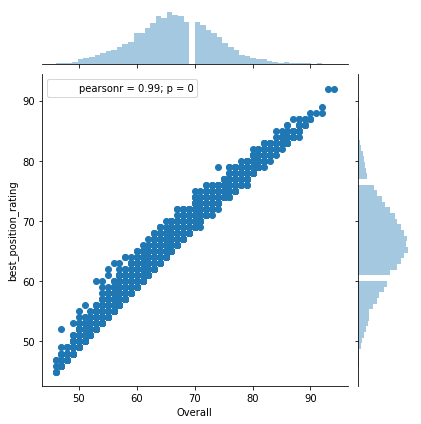

In [66]:
# what is the correlation between Overall and best_position_rating
sns.jointplot(x='Overall',y='best_position_rating',data=players)

# this is a very strong correlation. The Overall field is a good representation of skill.

In [67]:
# fill in missing values: if a player does not have a best position, 
# fill in his best position list with his preferred position

# turn the string of preferred positions into a list
players["preferred_positions"] = players["Preferred Positions"].apply(lambda x: x.split())

def fillBestPositions(row):
    if len(row['best_positions']) > 0:
        return row['best_positions']
    else:
        return row['preferred_positions']

players['best_positions'] = players.apply(fillBestPositions,axis=1)

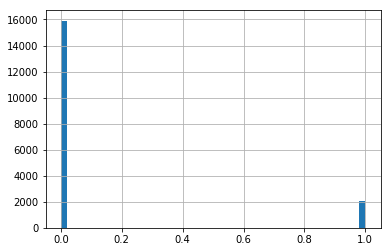

In [68]:
# create a filter that calculates the overlap
# between worst players best positions and all other players
def matchBestPositions(left,right):
    left = set(left)
    right = set(right)
    overlap = left.intersection(right)
    return len(overlap)/len(right)

# find madrid's worst player
worst = players.loc[worst_index]

players['overlap_with_worst'] = players['best_positions']\
        .apply(matchBestPositions,args=(worst['best_positions'],))
    
players['overlap_with_worst'].hist(bins=50)
# because our worst player is a goalkeeper, 
# players either absolutely match him or do not match him at all
# This is not a good test to see if the 50%filter is practical

In [69]:
# combine the position filter with the other filters
position_replacements = players[
    (players['Overall'] >= 1.1 * worst['Overall']) &
    (players["Value"] >= 10 * worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF") &
    (players['overlap_with_worst'] >= .5)
]
position_replacements
# we need to reduce the other filters to get at least 5 recommendations

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RF,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst
index,,,,,,,,,,,,,,,,,,,,,
680,A. Pyatov,33,https://cdn.sofifa.org/48/18/players/142902.png,Ukraine,https://cdn.sofifa.org/flags/49.png,79,79,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
985,S. Kapino,23,https://cdn.sofifa.org/48/18/players/205878.png,Greece,https://cdn.sofifa.org/flags/22.png,77,83,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,9000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
1078,I. Khune,30,https://cdn.sofifa.org/48/18/players/165247.png,South Africa,https://cdn.sofifa.org/flags/140.png,77,77,Kaizer Chiefs,https://cdn.sofifa.org/24/18/teams/110929.png,5500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
1253,R. Rey,26,https://cdn.sofifa.org/48/18/players/215069.png,Argentina,https://cdn.sofifa.org/flags/52.png,76,79,PAOK Thessaloniki,https://cdn.sofifa.org/24/18/teams/393.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
2180,Yoon Bo Sang,23,https://cdn.sofifa.org/48/18/players/233282.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,74,80,GwangJu FC,https://cdn.sofifa.org/24/18/teams/112258.png,5500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0


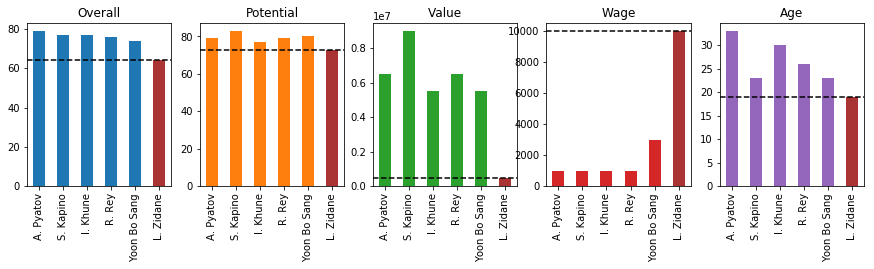

In [70]:
# create visualization to compare differences between replacements and current player

# add the worst player to the comparison
worst = players.loc[worst_index]
comparison = position_replacements.append(worst)

columns = ['Overall','Potential','Value','Wage','Age','Name']

ax = comparison[columns]\
    .plot(x='Name',kind='bar',subplots=True,legend=False,figsize=(15,3),layout=(1,5))


for index,subplot in enumerate(ax[0]):
    worst_value = comparison.loc[worst_index][columns[index]]
    subplot.axhline(worst_value, ls='--', color='black')
    subplot.set_xlabel('')
    subplot.patches[-1].set_facecolor('#aa3333')

### observations
note that all of these replacements are older than our worst player.  What is the correlation between age and skill? Perhaps our player will get better as he gets older, and we should hold onto him.
* what is the correlation between age and Overall?


correlation between Age and Overall
 0.46


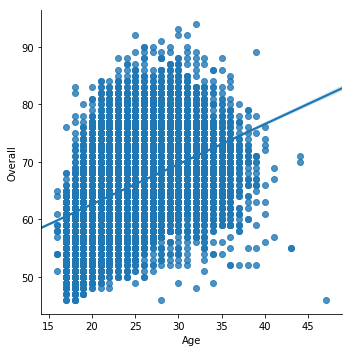

In [71]:
print('correlation between Age and Overall\n',round(players['Age'].corr(players['Overall']),2))
sns.lmplot(x='Age',y='Overall',data=players)

# The correlation is high enough that this is a plausible explanation.
# my next step should be to normalize for age
# to properly compare our player to the replacements.


# conclusion
I am not satisfied with these replacement recommendations.

the first problem is that I need to normalize for age. without this,we cannot account for the long-term skill or value of a player.

the second problem is that the value field is up for scrutiny. I suspect that 'value' depends on how good a player is compared to his teammates. it may be a bad indicator of that player's contribution if he moves to a new team. furthermore, a players fan base can affect this. moving to a new team,or to a new country,might ruin this bring the value way down.


### for further study
* How does normalizing for age change our recommendations?
* What is it that makes a player valuable?


---
# normalize for age

### problem
We are currently comparing players on their Overall skill across different ages. There is a positive correlation of 0.46 between Age and Overall. So our comparison is faulty.

### hypothesis
We can fix our comparison by normalizing for age. See the procedure below for the normalization function.

### assumptions
* we can treat age as a categorical value
* we can normalize by equalizing all geometric means
* younger players will get better over time
* comparing players skill after normalizing for age is a good way to determine replacements
* while our data only represents 1 year, building a good team requires a sense of multiple years

### procedure
* group Overall by age (treating age as a categorical value)
* calculate the geometric mean for each group
* identify the median mean amongst all groups
* calculate the coefficient for each group so that each group mean equals the median mean
* multiply Overallby the coefficient that corresponds to age
* use the age_adjusted_overall in the replacements filter

In [72]:
import scipy.stats.mstats as mstats

means = players.groupby('Age')['Overall'].apply(mstats.gmean)

median = means.median()

coefficients = median/means

def multiplyCoefficient(row):
    return coefficients.loc[row['Age']] * row['Overall']
    
players['age_adjusted_overall'] = players.apply(multiplyCoefficient,axis=1)
players['age_adjusted_overall'].head()

index
0    91.892183
1    90.457849
2    92.000000
3    89.485184
4    89.550407
Name: age_adjusted_overall, dtype: float64

In [73]:
worst = players.loc[worst_index]

# use the age_adjusted_overall in the replacements filter
# age_replacements = players[
#     (players['age_adjusted_overall'] >= 1.1 * worst['age_adjusted_overall']) &
#     (players["Value"] >= 10 * worst["Value"]) &
#     (players["Wage"]  < 0.5 * worst["Wage"]) &
#     (players["Club"] != "Real Madrid CF") &
#     (players['overlap_with_worst'] >= .5)
# ]
# age_replacements
# running this with the old filters now returns no results
# I need to reduce the expectations in order to get good replacements
age_replacements = players[
    (players['age_adjusted_overall'] >= 1.04 * worst['age_adjusted_overall']) &
    (players["Value"] >= 0.5 * worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF") &
    (players['overlap_with_worst'] >= .5)
]
age_replacements

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst,age_adjusted_overall
index,,,,,,,,,,,,,,,,,,,,,
680,A. Pyatov,33,https://cdn.sofifa.org/48/18/players/142902.png,Ukraine,https://cdn.sofifa.org/flags/49.png,79,79,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0,76.928620
985,S. Kapino,23,https://cdn.sofifa.org/48/18/players/205878.png,Greece,https://cdn.sofifa.org/flags/22.png,77,83,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,9000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0,79.231715
7865,J. Bijlow,19,https://cdn.sofifa.org/48/18/players/232229.png,Netherlands,https://cdn.sofifa.org/flags/34.png,67,80,Feyenoord,https://cdn.sofifa.org/24/18/teams/246.png,1100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0,76.656771
10016,P. Dahlberg,18,https://cdn.sofifa.org/48/18/players/233763.png,Sweden,https://cdn.sofifa.org/flags/46.png,65,78,IFK Göteborg,https://cdn.sofifa.org/24/18/teams/319.png,775000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0,77.192029
12715,M. Svilar,17,https://cdn.sofifa.org/48/18/players/230872.png,Belgium,https://cdn.sofifa.org/flags/7.png,63,83,SL Benfica,https://cdn.sofifa.org/24/18/teams/234.png,600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0,76.336718


In [80]:
# what is the overlap between age_replacements and position_replacements?
overlap = set(age_replacements.index).intersection(set(position_replacements.index))
print('overlap = ',len(overlap),'/',len(set(age_replacements.index)))
age_replacements.loc[overlap]

# apparently adjusting by age made a big difference in our recommendation

overlap =  2 / 5


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst,age_adjusted_overall
index,,,,,,,,,,,,,,,,,,,,,
680,A. Pyatov,33,https://cdn.sofifa.org/48/18/players/142902.png,Ukraine,https://cdn.sofifa.org/flags/49.png,79,79,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0,76.928620
985,S. Kapino,23,https://cdn.sofifa.org/48/18/players/205878.png,Greece,https://cdn.sofifa.org/flags/22.png,77,83,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,9000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0,79.231715


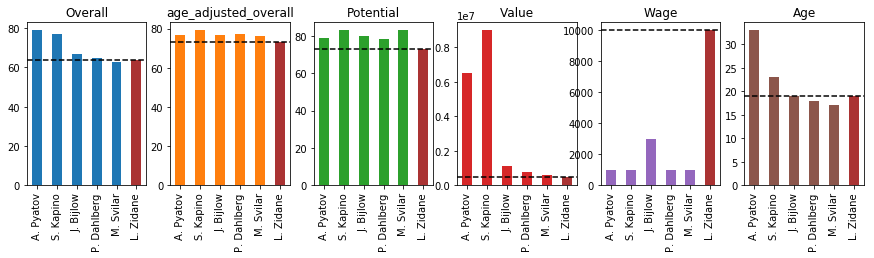

In [83]:
# create visualization to compare differences between replacements and current player

# add the worst player to the comparison
worst = players.loc[worst_index]
comparison = age_replacements.append(worst)

columns = ['Overall','age_adjusted_overall','Potential','Value','Wage','Age','Name']

ax = comparison[columns]\
    .plot(x='Name',kind='bar',subplots=True,legend=False,figsize=(15,3),layout=(1,6))


for index,subplot in enumerate(ax[0]):
    worst_value = comparison.loc[worst_index][columns[index]]
    subplot.axhline(worst_value, ls='--', color='black')
    subplot.set_xlabel('')
    subplot.patches[-1].set_facecolor('#aa3333')

# conclusion
this is a better recommendation. However, the age-adjusted overall margin is only 4%. This means that the recommended players are only at least 4% better than our player. The question is whether that is statistically significant? If it is not, then we need to reconsider if we need to try to recruit players with a higher wage.

### further study
* is a 4% on age-adjusted_overall statistically significant? 
    * is this a meaningful question?
* by how much do we need to raise the wage ceiling to get players that are worth trying to recruit?
    * what is the cost of recruiting a player?
    * what determines how likely a player is willing to change teams?